#Unsupervised learning

In unsupervised learning we want to group elements together. An economics application would be to segment the market into similar consumers, firms or products.

In this notebook, we look into

###K-means clustering and principle components analysis

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
from scipy.spatial.distance import euclidean

In [20]:
data = loadmat('../exercises/ex7data2.mat')
X = data['X']

In [21]:
def find_closest_centroids(centroids, X):
    """
    This function takes the locations of all centroids and the data matrix X
    and outputs a one-dimensional array idx that holds the index 
    (a value in {1,...,K}, where K is total number of centroids) 
    of the closest centroid to every training example.
    """
    idx = []
    for x_i in X:
        inner = x_i - centroids
        distances = [euclidean(x_i, c) for c in centroids]
        index_i = distances.index(min(distances))
        idx.append(index_i)
    return np.array(idx)

In [22]:
centroids = np.array([[3,3], [6,2], [8,5]])
closest = find_closest_centroids(centroids, X)
closest[0:3]

array([0, 2, 1])

In [23]:
def compute_centroid_means(centroids, c_index, X):
    """
    Computes, for each centroid, the mean of the points that were assigned to it
    """
    mean_centroid = []
    for i in range(len(centroids)):
        c_i = (c_index==i)
        mean_centroid.append(np.mean(X[c_i], axis=0))
    return np.array(mean_centroid)

In [24]:
compute_centroid_means(centroids, closest, X)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [25]:
def compute_cost(centroid, centroid_id, X):
    """
    Computes the cost after the K-means loop has completed
    """
    distance = X - centroid[centroid_id]
    return np.mean([euclidean(d_i[0], d_i[1]) for d_i in distance])

In [8]:
def k_means_loop(centroids, X, iterations):
    """
    Runs the K-means algroithm
    """
    count = 0
    new_c = centroids
    for i in range(iterations):
        count +=1
        c_index = find_closest_centroids(new_c, X)
        new_c = compute_centroid_means(new_c, c_index, X)
    c_index = find_closest_centroids(new_c, X)
    cost = compute_cost(new_c, c_index, X)
    return cost, new_c, c_index

Practicing this on an actual picture!

In [9]:
from scipy.ndimage import imread
picture = imread('../exercises/bird_small.png')
picture.shape
# this is a 128 x 128 pixel image
# reshaping to a RGB for each pixel
picture = picture.reshape((128*128, 3))

In [10]:
def random_init(X, k):
    """
    Random initialisation wrapper.
    """
    indices = np.random.choice(range(len(X)), k)
    vals = X[indices]
    return vals

In [65]:
init_centroids = random_init(picture, 16)

In [66]:
cost, new_c, index = k_means_loop(init_centroids, picture, 3)

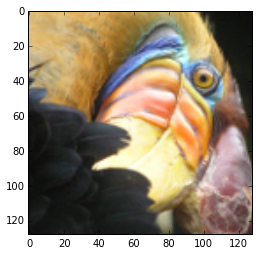

In [18]:
axes = plt.gca()
figure = plt.gcf()
axes.imshow(picture.reshape((128, 128, 3)))
plt.show()

In [67]:
new_pic = new_c[index]

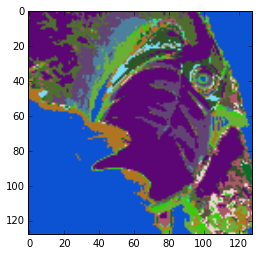

In [68]:
axes = plt.gca()
figure = plt.gcf()
axes.imshow(new_pic.reshape((128, 128, 3)))
plt.show()

### Another test. This time on a picture of Ben Cunnington giving the ol' don't argue.

In [198]:
from scipy.ndimage import imread
picture_cunno = imread('../exercises/ben_cunnington.png')
n1 = picture_cunno.shape[0]
n2 = picture_cunno.shape[1]
# this is a 128 x 128 pixel image
# reshaping to a RGB for each pixel
picture_cunno = picture_cunno.reshape((n1*n2, 3))

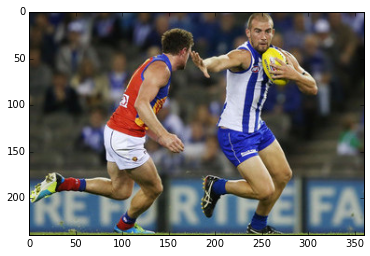

In [199]:
axes = plt.gca()
figure = plt.gcf()
axes.imshow(picture_cunno.reshape((n1, n2, 3)))
plt.show()

In [77]:
cost, new_c, index = k_means_loop(random_init(picture_cunno, 8), picture_cunno, 3)

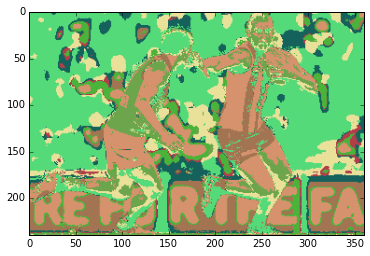

In [78]:
compressed_pic = new_c[index]
axes = plt.gca()
figure = plt.gcf()
axes.imshow(compressed_pic.reshape((n1, n2, 3)))
plt.show()

It works! but super slow on this old mbp.

###Unsupervised learning

###Principle components analysis

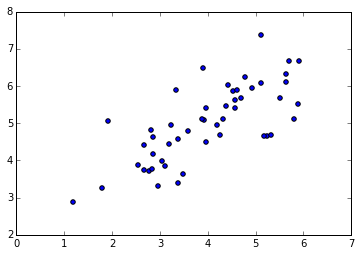

In [200]:
data = loadmat('../exercises/ex7data1.mat')
X = data['X']
plt.scatter(X[:,0], X[:,1], marker = 'o')

In [10]:
def feature_normalise(X):
    """
    Normalises feature
    """
    cols = X.shape[1]
    norm_X = np.zeros(X.shape)
    for i in range(cols):
        col_mean = np.mean(X[:,i])
        col_std = np.std(X[:,i])
        norm_X[:,i] = (X[:,i] - col_mean) / col_std
    return norm_X.T, col_mean, col_std

In [ ]:
def feature_unnormalise

In [11]:
def pca(X, k):
    """
    Computes k principle components of X
    """
    norm_X, mu, sigma = feature_normalise(X)
    cov_sigma = np.dot(norm_X, norm_X.T) / X.shape[0]
    u, s, v = np.linalg.svd(cov_sigma)
    U_k = u[:,:k]
    z = np.dot(U_k.T, norm_X)
    return z, U_k

In [12]:
def recover_data(pc, u):
    """
    Recovers data from principle components
    """
    x = np.dot(u, pc)
    return x

In [16]:
pc, u = pca(X, 1)
norm_X, mu, sigma = feature_normalise(X)
norm_X = norm_X.T
x_rec = recover_data(pc, u)

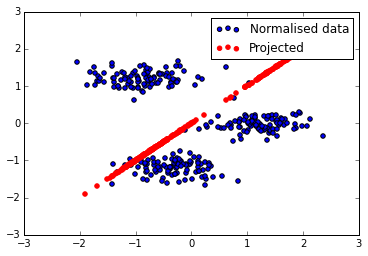

In [18]:
plt.scatter(norm_X[:,0], norm_X[:,1], marker = 'o', label = 'Normalised data')
plt.scatter(pc, pc, marker = 'o', color = 'r', label = 'Projected')
plt.legend()
plt.show()

In [206]:
face_data = loadmat('../exercises/ex7faces.mat')
face_X = face_data['X']

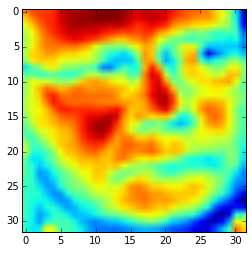

In [207]:
axes = plt.gca()
figure = plt.gcf()
axes.imshow(face_X[1].reshape((32, 32)).T)
plt.show()

In [208]:
pc_face, u_face = pca(face_X, 100)
face_x_rec = recover_data(pc_face, u_face)

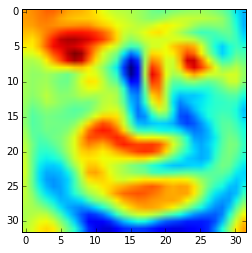

In [209]:
axes = plt.gca()
figure = plt.gcf()
axes.imshow(face_x_rec.T[1].reshape((32, 32)).T)
plt.show()